<h1>DATA ANALYTICS PROJECT</h1>

<h2>PHILIPPINES DENGUE RECORD</h2>
<h3>Inclusie year: 2016 - 2020</h3>
<h4>Analyst:</h4>
<ol>
    <h3>Leslie Faith D. Navaja</h3>
    <h3>Mark Eugine M. Casañada</h3>
</ol>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h2>DATA PREPARATION</h2>

In [2]:
df = pd.read_csv('dataset\\Family Income and Expenditure.csv')

In [3]:
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


<h3>FILLING NULL VALUES</h3>

In [4]:
df['Household Head Occupation'] = df['Household Head Occupation'].fillna('uncouted')
df['Household Head Class of Worker'] = df['Household Head Class of Worker'].fillna('uncouted')
df['Toilet Facilities'] = df['Toilet Facilities'].fillna('uncouted')

In [5]:
df.isnull().sum()

Total Household Income                           0
Region                                           0
Total Food Expenditure                           0
Main Source of Income                            0
Agricultural Household indicator                 0
Bread and Cereals Expenditure                    0
Total Rice Expenditure                           0
Meat Expenditure                                 0
Total Fish and  marine products Expenditure      0
Fruit Expenditure                                0
Vegetables Expenditure                           0
Restaurant and hotels Expenditure                0
Alcoholic Beverages Expenditure                  0
Tobacco Expenditure                              0
Clothing, Footwear and Other Wear Expenditure    0
Housing and water Expenditure                    0
Imputed House Rental Value                       0
Medical Care Expenditure                         0
Transportation Expenditure                       0
Communication Expenditure      

<h3>CHANGING DATA TYPE TO AN APPROPRIATE</h3>

In [6]:
df['Region'] = df['Region'].astype('category')
df['Main Source of Income'] = df['Main Source of Income'].astype('category')
df['Household Head Sex'] = df['Household Head Sex'].astype('category')
df['Household Head Marital Status'] = df['Household Head Marital Status'].astype('category')
df['Household Head Highest Grade Completed'] = df['Household Head Highest Grade Completed'].astype('category')
df['Household Head Job or Business Indicator'] = df['Household Head Job or Business Indicator'].astype('category')
df['Household Head Occupation'] = df['Household Head Occupation'].astype('category')
df['Household Head Class of Worker'] = df['Household Head Class of Worker'].astype('category')
df['Type of Household'] = df['Type of Household'].astype('category')
df['Type of Building/House'] = df['Type of Building/House'].astype('category')
df['Type of Roof'] = df['Type of Roof'].astype('category')
df['Type of Walls'] = df['Type of Walls'].astype('category')
df['Tenure Status'] = df['Tenure Status'].astype('category')
df['Toilet Facilities'] = df['Toilet Facilities'].astype('category')
df['Main Source of Water Supply'] = df['Main Source of Water Supply'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Total Household Income                         41544 non-null  int64   
 1   Region                                         41544 non-null  category
 2   Total Food Expenditure                         41544 non-null  int64   
 3   Main Source of Income                          41544 non-null  category
 4   Agricultural Household indicator               41544 non-null  int64   
 5   Bread and Cereals Expenditure                  41544 non-null  int64   
 6   Total Rice Expenditure                         41544 non-null  int64   
 7   Meat Expenditure                               41544 non-null  int64   
 8   Total Fish and  marine products Expenditure    41544 non-null  int64   
 9   Fruit Expenditure                      

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h2 style='color: Blue;'>UNIVARIATE</h2>

In [8]:
average = df['Total Household Income'].mean()
highest = df['Total Household Income'].max()
lowest = df['Total Household Income'].min()
print(f'Average : {average}\nHighest : {highest}\nLowest : {lowest}')

Average : 247555.58480165608
Highest : 11815988
Lowest : 11285


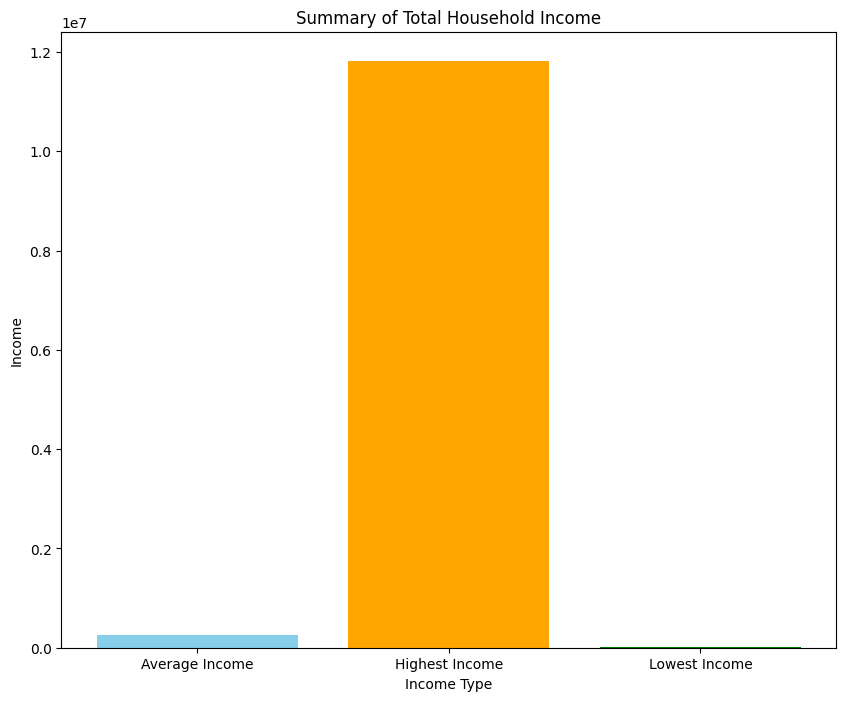

In [9]:
labels = ['Average Income', 'Highest Income', 'Lowest Income']
values = [average, highest, lowest]

plt.bar(labels, values, color=['skyblue', 'orange', 'green'])
plt.title("Summary of Total Household Income")
plt.ylabel("Income")
plt.xlabel("Income Type")
plt.gcf().set_size_inches(10, 8)
plt.style.use('ggplot')
plt.show()

<p><span style='color: red;'>Question:</span> What is the average total household income, and what does the range between the lowest and highest incomes suggest about income distribution?.</p>

<p><span style='color: green;'>INSIGHT 1:</span> The average total household income is approximately ₱247,556, which is significantly lower than the highest income of ₱11,815,988. This wide gap suggests a highly unequal income distribution, likely skewed by a small number of very high-income households. The lowest income recorded is ₱11,285, indicating that some households are earning well below the average, potentially highlighting income disparity or poverty within the population.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [10]:
average_food = df['Total Food Expenditure'].mean()
highest_food = df['Total Food Expenditure'].max()
lowest_food = df['Total Food Expenditure'].min()
print(f'Average : {average_food}\nHighest : {highest_food}\nLowest : {lowest_food}')

Average : 85099.15819372232
Highest : 827565
Lowest : 2947


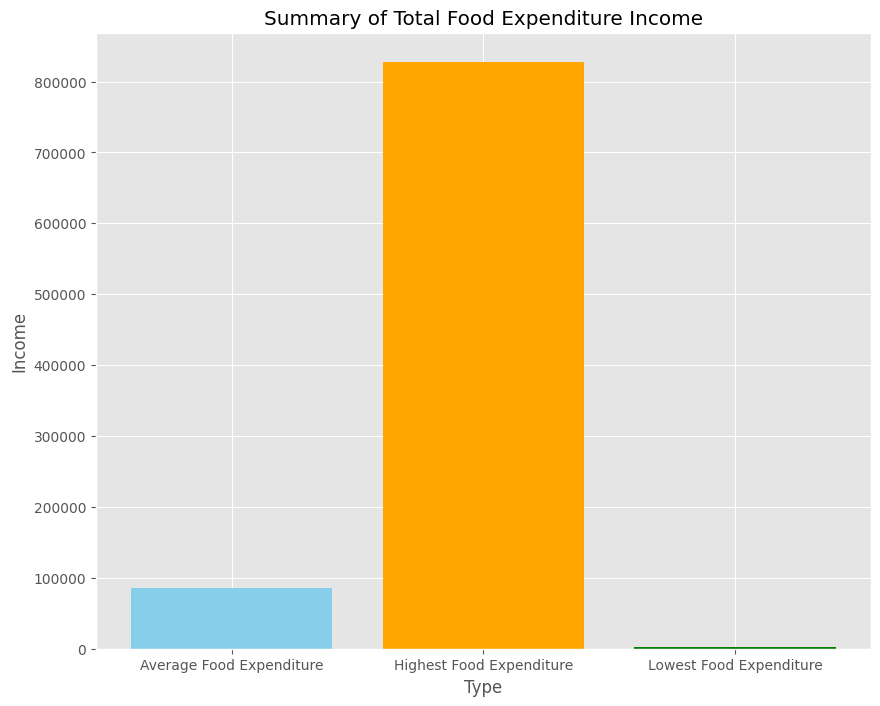

In [11]:
labels = ['Average Food Expenditure', 'Highest Food Expenditure', 'Lowest Food Expenditure']
values = [average_food, highest_food, lowest_food]

plt.bar(labels, values, color=['skyblue', 'orange', 'green'])
plt.title("Summary of Total Food Expenditure Income")
plt.ylabel("Income")
plt.xlabel("Type")
plt.gcf().set_size_inches(10, 8)
plt.show()

<p><span style="color: red;">Question:</span> What does the disparity between the highest, lowest, and average food expenditures reveal about food access and household spending behavior?</p>

<p><span style='color: green;'>INSIGHT 2:</span> The average total food expenditure is approximately ₱85,099, while the highest expenditure reaches ₱827,565 and the lowest is only ₱2,947. This large disparity indicates significant variation in household food spending, which could be influenced by differences in household income, size, lifestyle, or access to food resources. The highest spenders are allocating nearly 10 times more than the average, while some households are spending well below the basic nutritional threshold, possibly pointing to food insecurity among lower-income groups.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [12]:
income_counts = df['Main Source of Income'].value_counts()

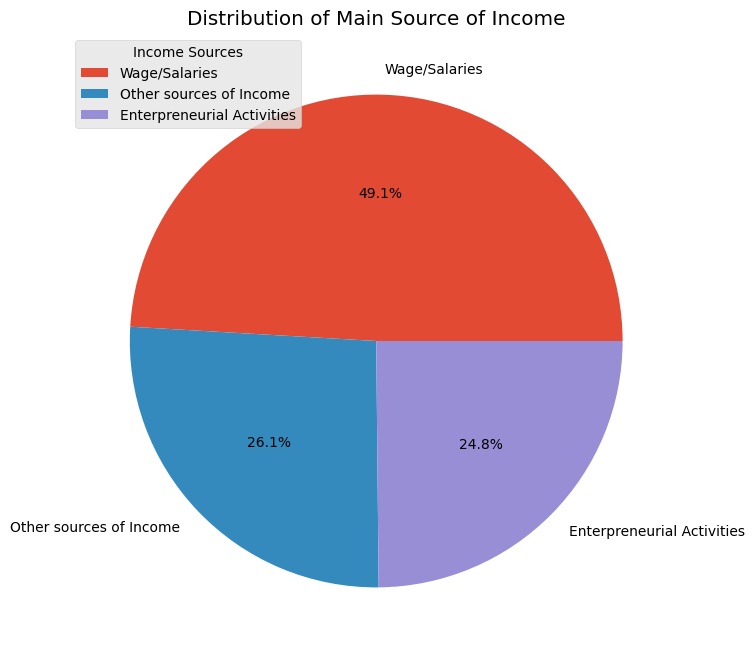

In [13]:
labels = income_counts.index
values = income_counts.values

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Distribution of Main Source of Income")
plt.gcf().set_size_inches(10, 8)
plt.legend(title='Income Sources')
plt.show()

<p><span style="color: red;">Question:</span> What is the most common main source of income among households, and what does this indicate about the structure of the economy?</p>

<p><span style='color: green;'>INSIGHT 3:</span> The majority of households rely on wages or salaries as their main source of income (20,388 households, 49.1%), followed by other sources of income (10,836 households, 26.1%) and entrepreneurial activities (10,320 households, 24.8%). This suggests that the formal employment sector is the dominant income provider, but a significant portion of the population also depends on non-traditional or self-generated income sources. The relatively high number of households engaged in entrepreneurial activities may reflect informal economy participation, small business reliance, or self-employment trends.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [14]:
df['Tobacco Expenditure'].mean()

np.float64(2294.736183323705)

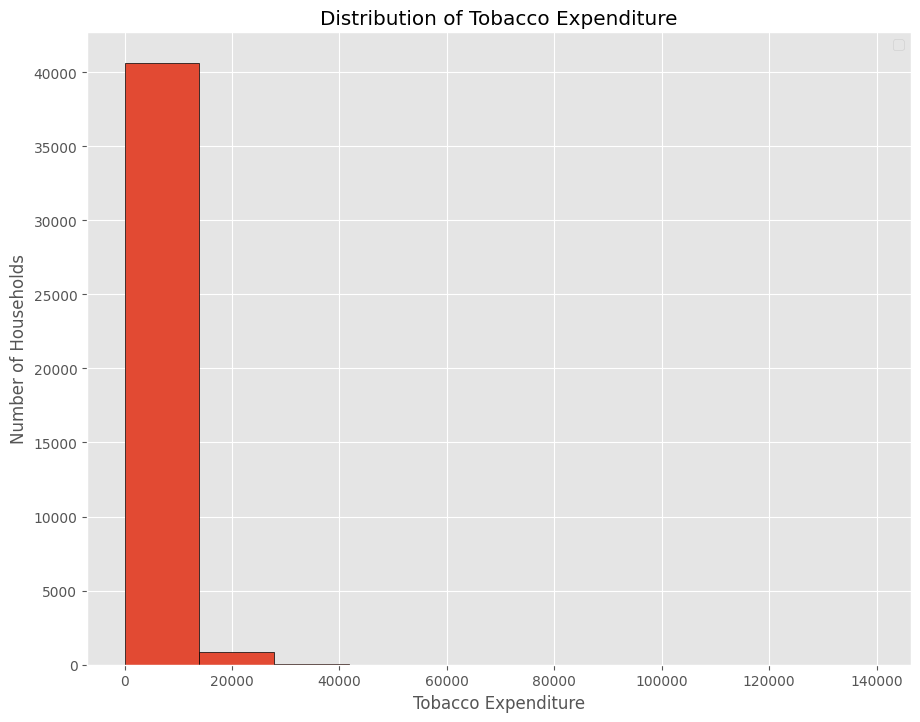

In [15]:
plt.hist(df['Tobacco Expenditure'], edgecolor='black')
plt.title("Distribution of Tobacco Expenditure")
plt.xlabel("Tobacco Expenditure")
plt.ylabel("Number of Households")
plt.legend()
plt.tight_layout()
plt.gcf().set_size_inches(10, 8)
plt.show()

<p><span style="color: red;">Question:</span> What is the average household expenditure on tobacco, and how significant is this relative to lower-income households?</p>

<p><span style='color: green;'>INSIGHT 4:</span> The average household tobacco expenditure is approximately ₱2,295. While this may seem modest compared to overall income or food expenses, it represents a non-negligible amount, especially for lower-income households. For those near the minimum income level (₱11,285), spending over ₱2,000 on tobacco could account for 20% or more of their income, potentially diverting funds from essential needs like food, education, or healthcare.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [16]:
df['Education Expenditure'].mean()

np.float64(7473.500481417293)

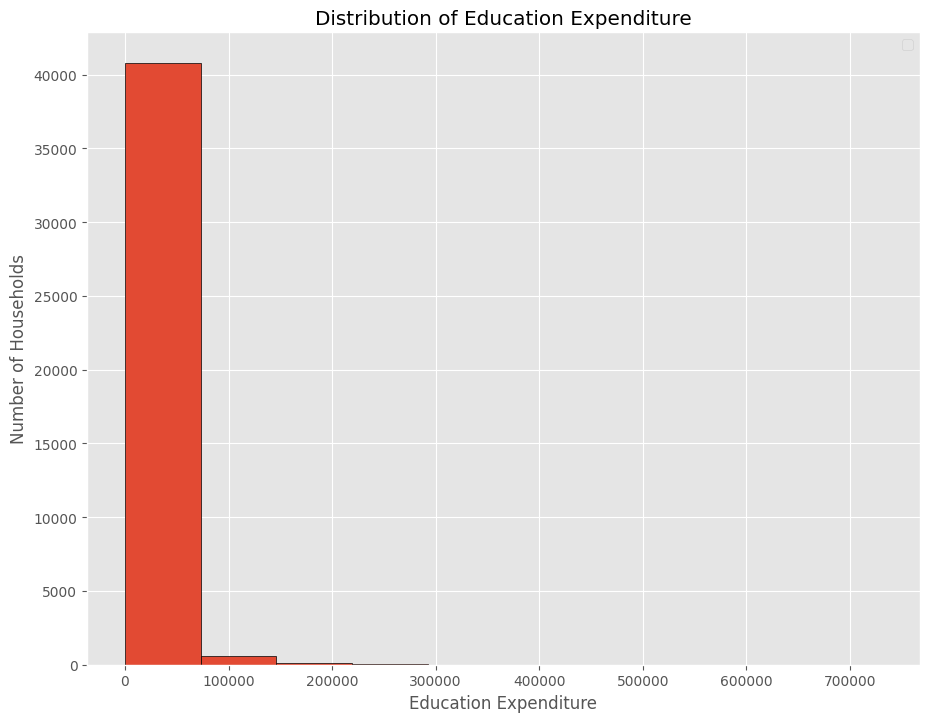

In [17]:
plt.hist(df['Education Expenditure'], edgecolor='black')
plt.title("Distribution of Education Expenditure")
plt.xlabel("Education Expenditure")
plt.ylabel("Number of Households")
plt.legend()
plt.tight_layout()
plt.gcf().set_size_inches(10, 8)
plt.show()

<p><span style="color: red;">Question:</span> How does the average education expenditure compare to other major expenses, and what might this imply about educational access or priorities?</p>


<p><span style='color: green;'>INSIGHT 5:</span> The average household education expenditure is approximately ₱7,474, which is noticeably lower than the average food expenditure (₱85,099). While food naturally takes priority as a basic need, the relatively low investment in education may signal limited access to or prioritization of educational opportunities, particularly among lower-income households.</p>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

<h2 style='color: Blue;'>BIVARIATE</h2>

In [18]:
df['Alcoholic Beverages Expenditure'].corr(df['Tobacco Expenditure'])

np.float64(0.2569025101442175)

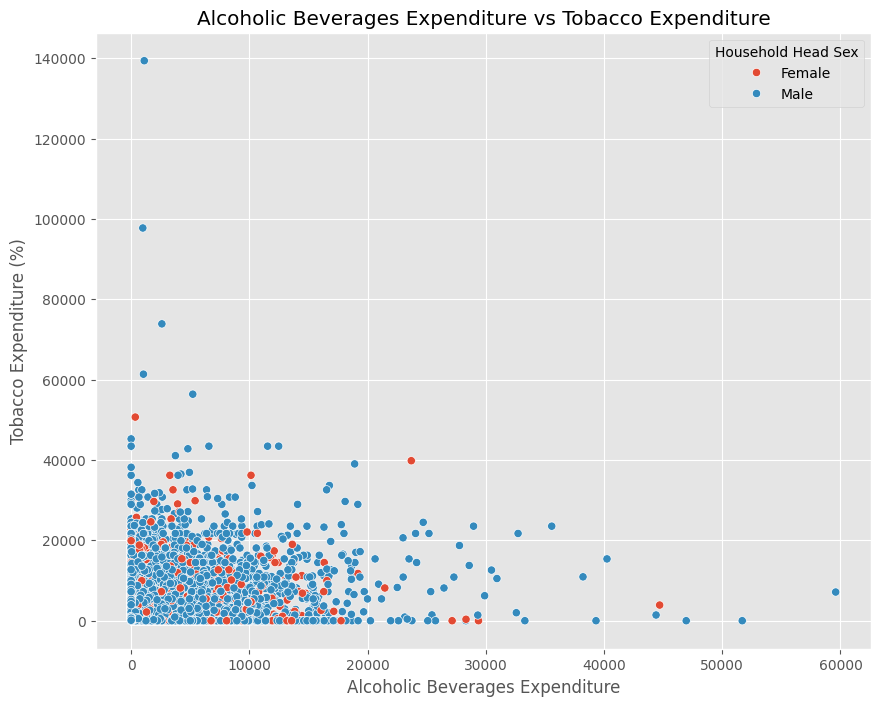

In [19]:
sns.scatterplot(x=df['Alcoholic Beverages Expenditure'], y=df['Tobacco Expenditure'], hue=df['Household Head Sex'])
plt.title('Alcoholic Beverages Expenditure vs Tobacco Expenditure')
plt.xlabel('Alcoholic Beverages Expenditure')
plt.ylabel('Tobacco Expenditure (%)')
plt.gcf().set_size_inches(10, 8)
plt.grid(True)
plt.show()

<p><span style="color: red;">Question:</span> Is there a relationship between spending on alcoholic beverages and tobacco, and what does this suggest about household spending patterns?</p>

<p><span style='color: green;'>INSIGHT 6:</span> There is a moderate positive correlation (r ≈ 0.26) between alcoholic beverages expenditure and tobacco expenditure. This suggests that households that spend more on tobacco also tend to spend more on alcohol, and vice versa. While the correlation isn't strong, it is statistically meaningful enough to indicate a linked pattern of discretionary spending on potentially harmful substances.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [20]:
wage_salaries = df[df['Main Source of Income'] == 'Wage/Salaries']

original = df['Household Head Sex'].value_counts()
ws = wage_salaries['Household Head Sex'].value_counts()

average_male = np.round((ws['Male'] / original['Male']) * 100)
average_female = np.round((ws['Female'] / original['Female']) * 100)

print('ORGINAL')
print(original)
print('WAGE / SALARY')
print(ws)

print(f'Male : {average_male}%')
print(f'Female : {average_female}%')

ORGINAL
Household Head Sex
Male      32483
Female     9061
Name: count, dtype: int64
WAGE / SALARY
Household Head Sex
Male      16916
Female     3472
Name: count, dtype: int64
Male : 52.0%
Female : 38.0%


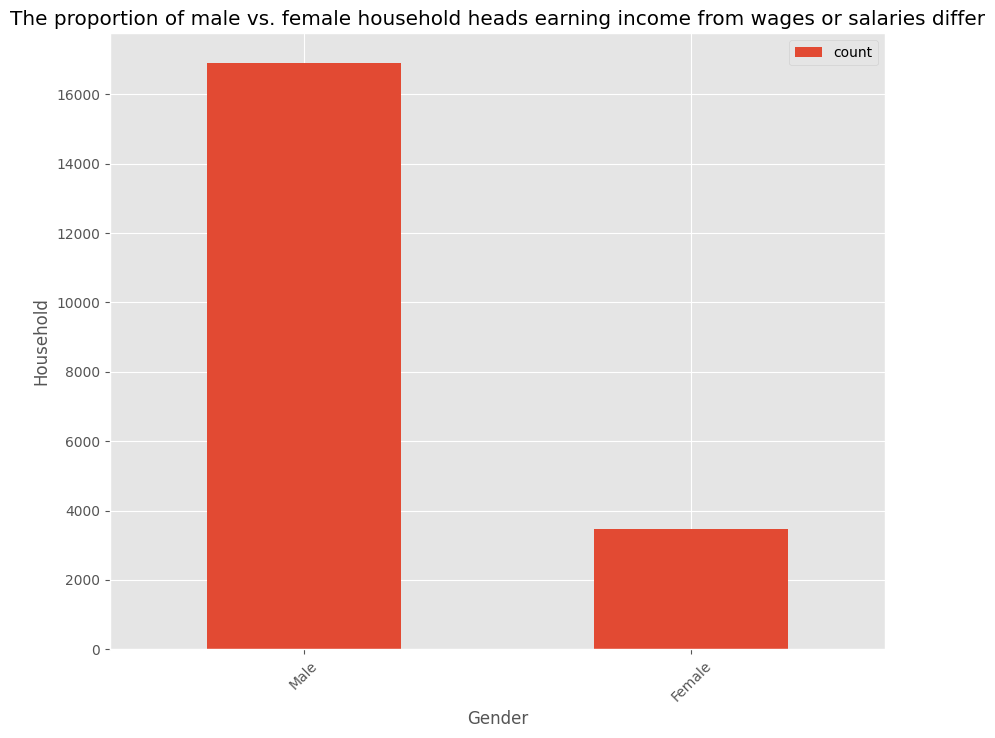

In [21]:
ws.plot(kind='bar')
plt.title('The proportion of male vs. female household heads earning income from wages or salaries differ')
plt.xlabel('Gender')
plt.ylabel('Household')
plt.gcf().set_size_inches(10, 8)
plt.xticks(rotation=45)
plt.legend()
plt.show()

<p><span style="color: red;">Question:</span> How does the proportion of male vs. female household heads earning income from wages or salaries differ, and what does this say about gender roles in employment?</p>

<p><span style='color: green;'>INSIGHT  7:</span> Among households headed by males, 52% earn their main income from wages or salaries, while only 38% of female-headed households do the same. This suggests that male household heads are more likely to be engaged in formal employment, whereas female household heads may be more dependent on informal work, entrepreneurial activities, or other sources of income.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [22]:
df['Total Household Income'].corr(df['Total Food Expenditure'])

np.float64(0.663659951604057)

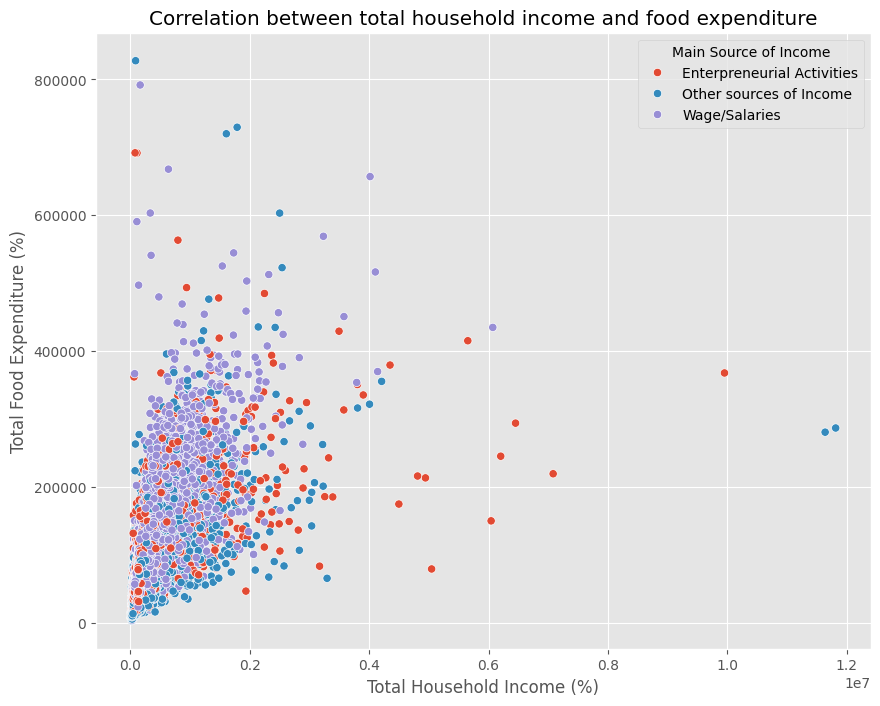

In [23]:
sns.scatterplot(x=df['Total Household Income'], y=df['Total Food Expenditure'], hue=df['Main Source of Income'])
plt.title('Correlation between total household income and food expenditure')
plt.ylabel('Total Food Expenditure (%)')
plt.xlabel('Total Household Income (%)')
plt.gcf().set_size_inches(10, 8)
plt.grid(True)
plt.show()

<p><span style="color: red;">Question:</span> Is there a correlation between total household income and food expenditure, and what does this imply about how income influences consumption?</p>

<p><span style='color: green;'>INSIGHT 8:</span> There is a strong positive correlation (r ≈ 0.66) between total household income and total food expenditure. This means that, in general, as household income increases, food expenditure also tends to increase.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [24]:
hs_grad = df[df['Household Head Highest Grade Completed'] == 'High School Graduate']
hs_grad['Total Household Income'].mean()

np.float64(246012.8361030328)

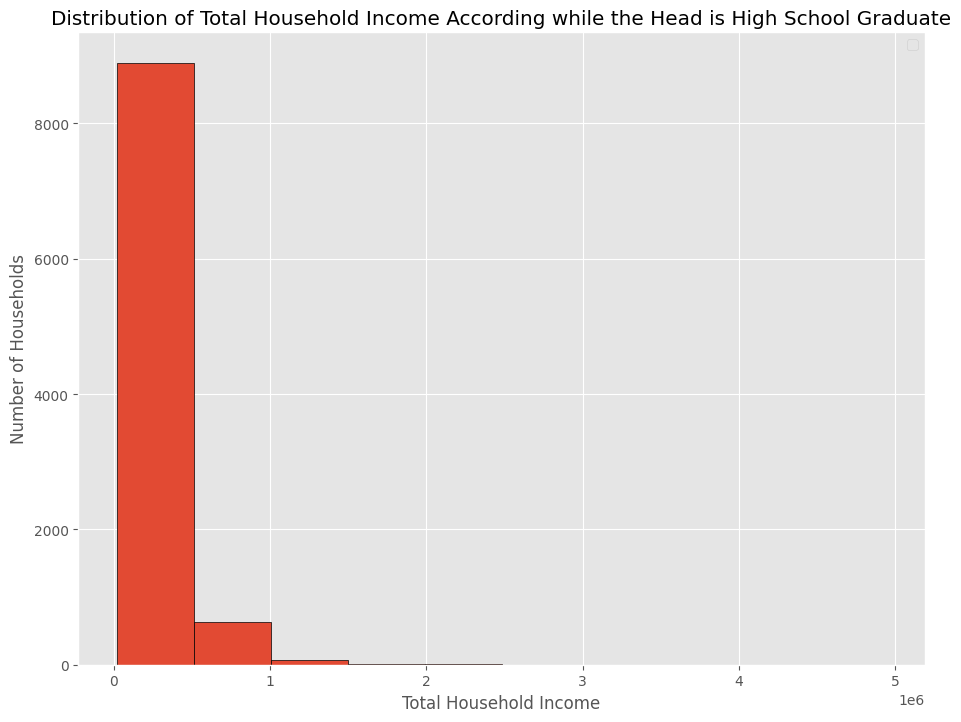

In [25]:
plt.hist(hs_grad['Total Household Income'], edgecolor='black')
plt.title("Distribution of Total Household Income According while the Head is High School Graduate")
plt.xlabel("Total Household Income")
plt.ylabel("Number of Households")
plt.legend()
plt.tight_layout()
plt.gcf().set_size_inches(10, 8)
plt.show()

<p><span style="color: red;">Question:</span> What is the average income of households headed by high school graduates, and how does it compare to the national average?</p>

<p><span style='color: green;'>INSIGHT 9:</span> Households headed by high school graduates have an average income of approximately ₱246,013, which is very close to the overall average household income of ₱247,556. This suggests that completing high school is generally sufficient to reach the national average income level, at least in terms of household earnings.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [26]:
hs_indicator = hs_grad['Household Head Job or Business Indicator'].value_counts()
hs_indicator

Household Head Job or Business Indicator
With Job/Business    8129
No Job/Business      1499
Name: count, dtype: int64

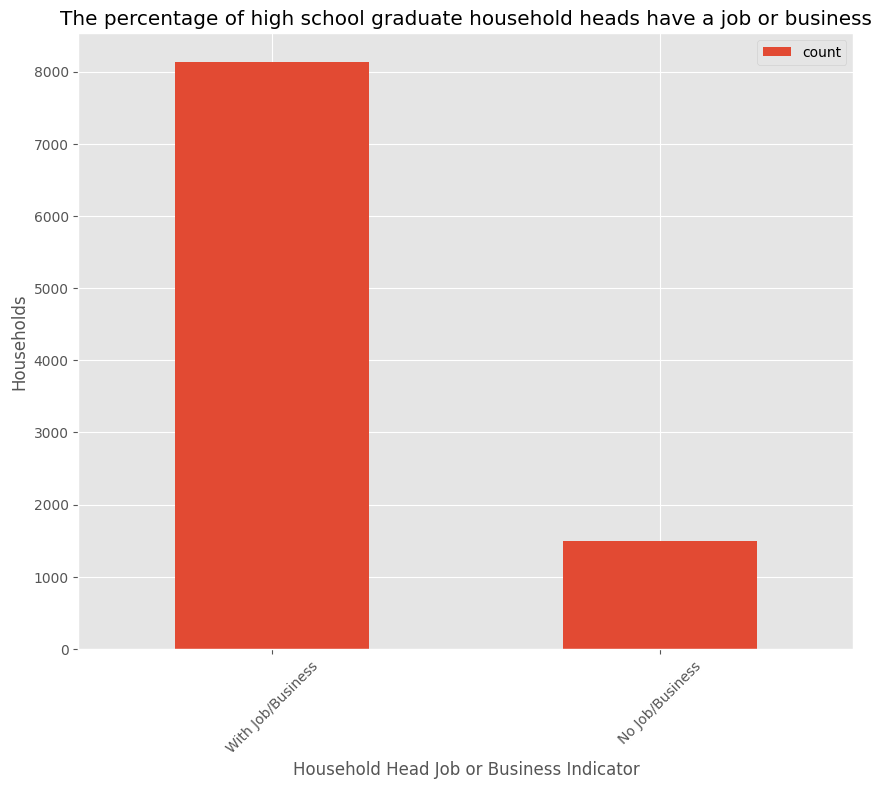

In [27]:
hs_indicator.plot(kind='bar')
plt.title('The percentage of high school graduate household heads have a job or business')
plt.xlabel('Household Head Job or Business Indicator')
plt.ylabel('Households')
plt.gcf().set_size_inches(10, 8)
plt.xticks(rotation=45)
plt.legend()
plt.show()

<p><span style="color: red;">Question:</span> What percentage of high school graduate household heads have a job or business, and what does this suggest about the employability of high school graduates?</p>

<p><span style='color: green;'>INSIGHT 10:</span> Among household heads who are high school graduates, about 84% (8,129 out of 9,628) have a job or business, while 16% (1,499) do not. This high participation rate in employment or entrepreneurship suggests that a high school education provides a strong foundation for entering the workforce or running a business.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [28]:
type_total_group = df.groupby(['Type of Household'])['Total Household Income'].mean().reset_index()
type_total_group

,Type of Household,Total Household Income
0,Extended Family,308349.946721
1,Single Family,219228.541677
2,Two or More Nonrelated Persons/Members,364741.532934


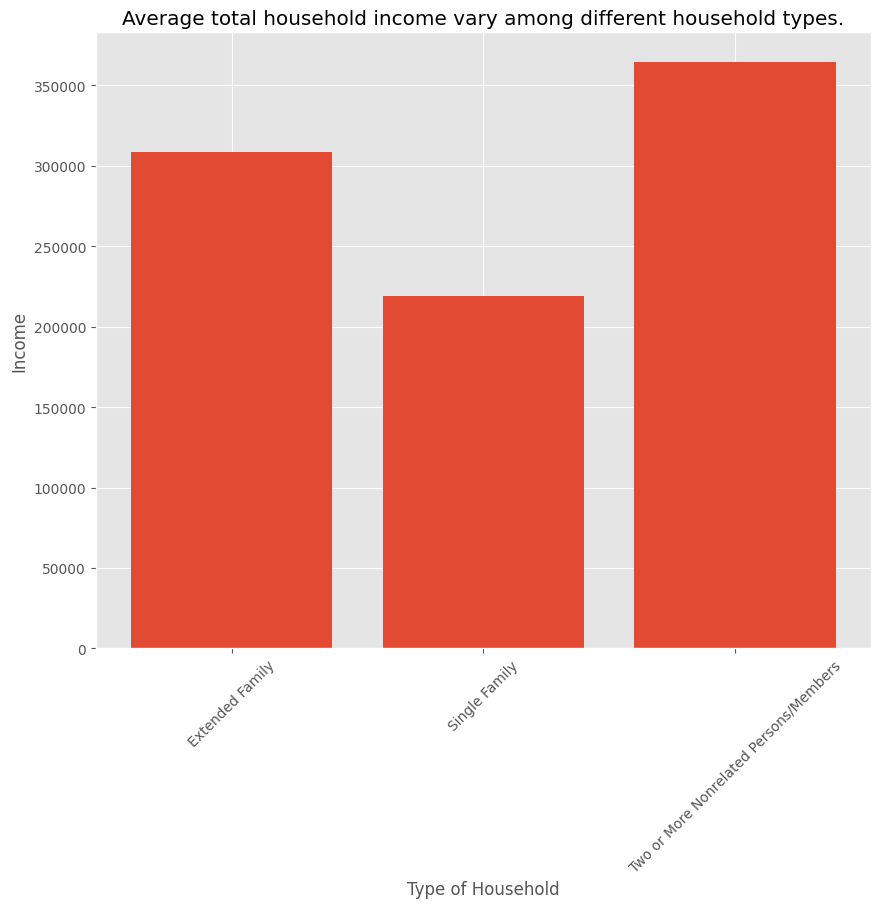

In [29]:
plt.bar(type_total_group['Type of Household'], type_total_group['Total Household Income'])
plt.title("Average total household income vary among different household types.")
plt.ylabel("Income")
plt.xlabel("Type of Household")
plt.gcf().set_size_inches(10, 8)
plt.xticks(rotation=45)
plt.show()

<p><span style='color: red;'>Question:</span> How does the average total household income vary among different household types, and what can be inferred about income dynamics based on household composition?</p>

<p><span style='color: green;'>INSIGHT 11:</span> Households composed of two or more nonrelated members have the highest average total income at approximately ₱364,742, followed by extended families with ₱308,350, and single-family households with the lowest average income of ₱219,229. This suggests that households with multiple income earners who are not necessarily related may combine resources more effectively, leading to higher total incomes. In contrast, single-family households may have fewer working members, resulting in lower average income. The structure and size of a household can significantly influence its earning capacity.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [30]:
building = df.groupby(['Type of Building/House'])['Total Household Income'].mean().reset_index()
building

,Type of Building/House,Total Household Income
0,Commercial/industrial/agricultural building,337213.980392
1,Duplex,298840.435424
2,Institutional living quarter,234019.666667
3,Multi-unit residential,346994.468021
4,"Other building unit (e.g. cave, boat)",218683.000000
5,Single house,242637.617523


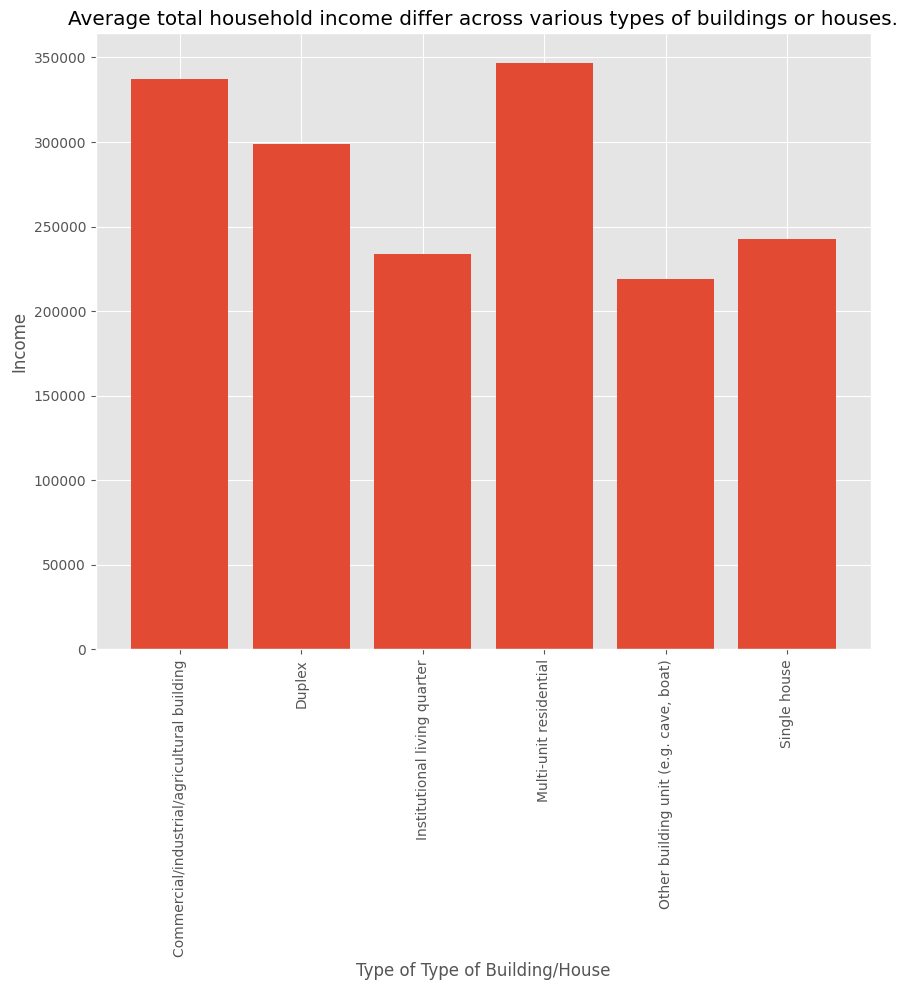

In [31]:
plt.bar(building['Type of Building/House'], building['Total Household Income'])
plt.title("Average total household income differ across various types of buildings or houses.")
plt.ylabel("Income")
plt.xlabel("Type of Type of Building/House")
plt.gcf().set_size_inches(10, 8)
plt.xticks(rotation=90)
plt.show()

<p><span style="color: red;">Question:</span> How does the average total household income differ across various types of buildings or houses, and what trends can be observed in relation to housing structure and income level?</p>

<p><span style='color: green;'>INSIGHT 12:</span> Households living in multi-unit residential buildings have the highest average income at approximately ₱346,994, followed closely by those in commercial, industrial, or agricultural buildings (₱337,214) and duplexes (₱298,840). On the other hand, the lowest average incomes are seen in households residing in unconventional structures like caves or boats (₱218,683), as well as in single houses (₱242,638) and institutional living quarters (₱234,020). These differences suggest that more urbanized or multi-family housing may be associated with higher income levels, potentially due to proximity to economic centers or shared cost-of-living arrangements.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [32]:
df['Total Number of Family members'].corr(df['Total number of family members employed'])

np.float64(0.4057511684409436)

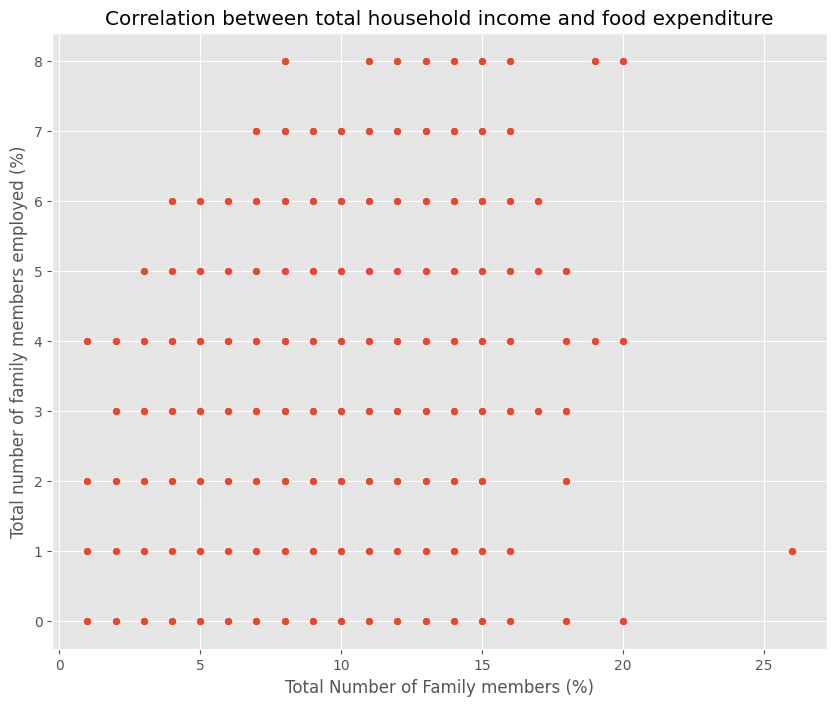

In [40]:
sns.scatterplot(x=df['Total Number of Family members'], y=df['Total number of family members employed'])
plt.title('Correlation between total household income and food expenditure')
plt.xlabel('Total Number of Family members (%)')
plt.ylabel('Total number of family members employed (%)')
plt.gcf().set_size_inches(10, 8)
plt.grid(True)
plt.show()

<p><span style='color: red;'>Question:</span> Is there a relationship between the total number of family members and the number of employed family members, and what does the strength of this correlation indicate?</p>

<p><span style='color: green;'>INSIGHT 13:</span> There is a moderate positive correlation (r ≈ 0.41) between the total number of family members and the number of employed family members. This suggests that as family size increases, the number of employed members also tends to increase, though not proportionally. Larger families may have more potential workers, but not all members may be of working age or participating in the labor force.</p>

<hr style='border-top: 1px solid #ad2831;border-bottom: 1px solid #ad2831;'>

In [34]:
group_one = df.groupby(['Type of Building/House', 'Type of Household', 'Region']).size().unstack()
# group_one

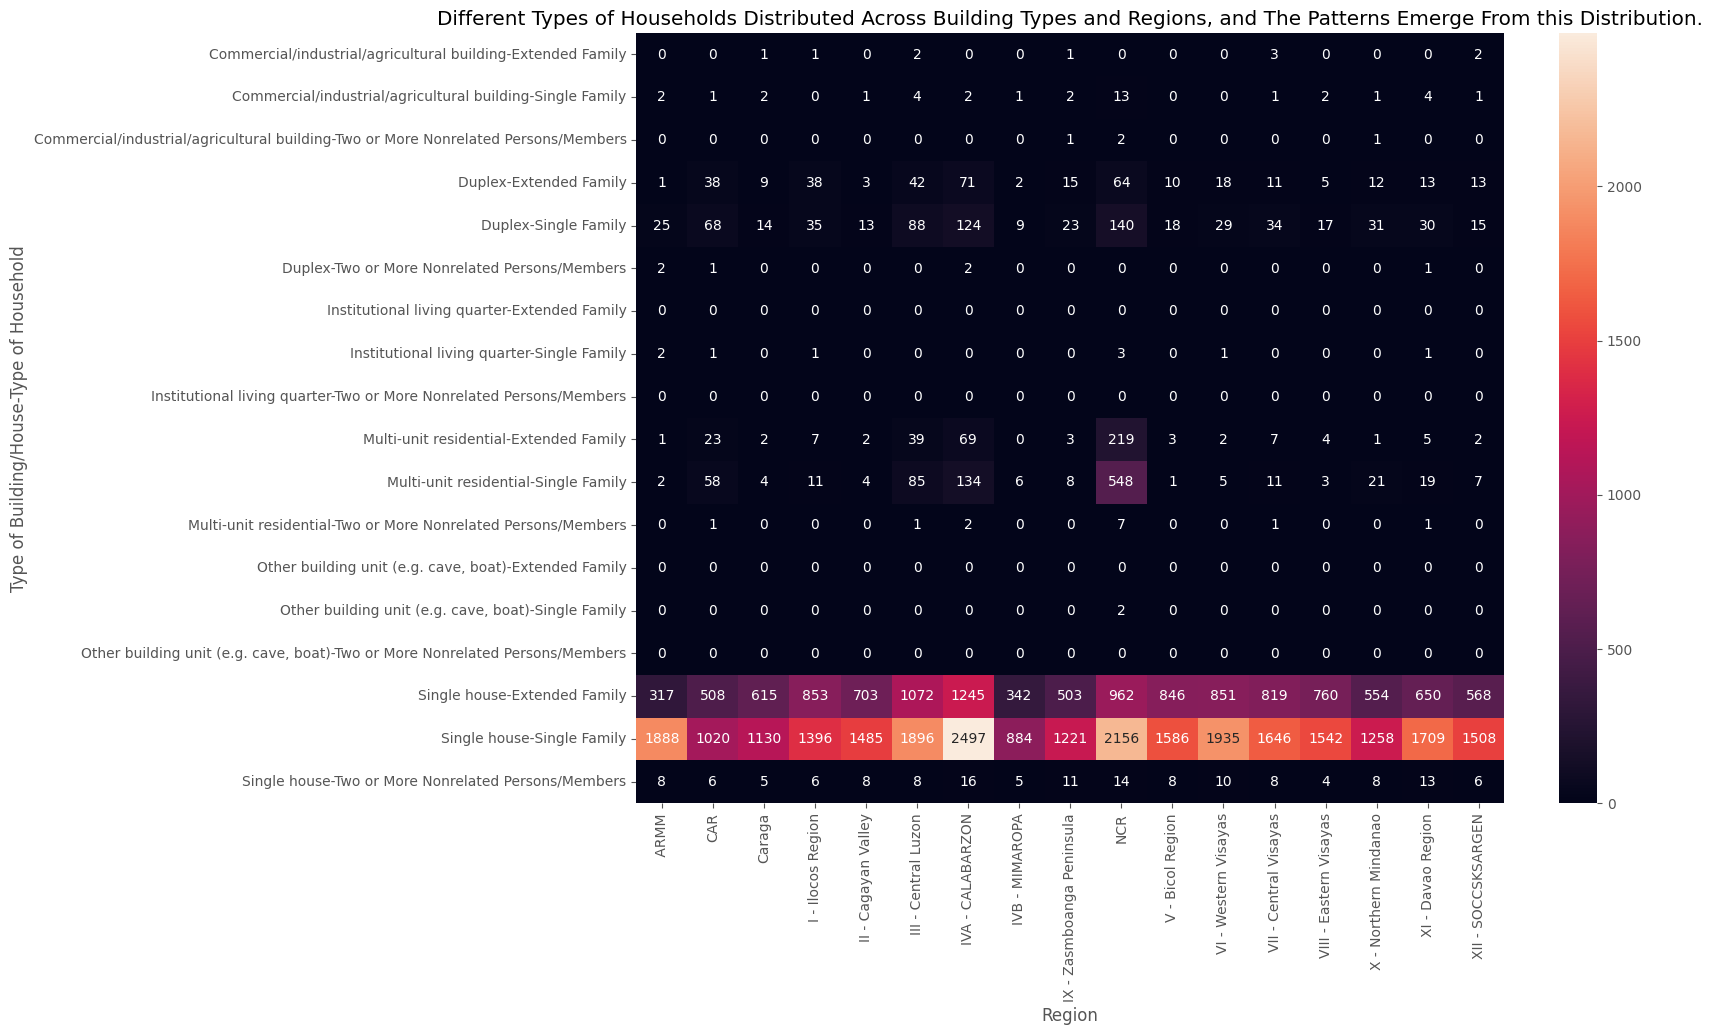

In [35]:
sns.heatmap(group_one, annot=True, fmt='g')
plt.title("Different Types of Households Distributed Across Building Types and Regions, and The Patterns Emerge From this Distribution.")
plt.gcf().set_size_inches(14,10)
plt.show()

<p><span style='color: red;'>Question:</span> How are different types of households distributed across building types and regions, and what patterns emerge from this distribution?</p>

<p><span style='color: green;'>INSIGHT 14:</span> Across most regions, <strong>Single Family households living in Single Houses</strong> are the most dominant group. For instance, in Region IVA (CALABARZON), there are 2,497 such households, and in Region III (Central Luzon), there are 1,896. This suggests that traditional family structures in standalone residential homes remain the most prevalent living arrangement in the Philippines.</p>

<p><span style='color: green;'>INSIGHT 15:</span> The National Capital Region (NCR) shows a significantly higher number of households living in <strong>multi-unit residential buildings</strong>, particularly among Single Family households (548) and Extended Families (219). This trend reflects the urban nature of NCR, where space constraints and population density lead to vertical housing solutions.</p>

<p><span style='color: green;'>INSIGHT 16:</span> <strong>Non-traditional housing types</strong> such as commercial/industrial/agricultural buildings, institutional living quarters, and other units (e.g., caves, boats) have very low household counts across all regions. For example, in the "Other building unit" category, only 2 households (in NCR) are recorded. This indicates that such housing types are rarely used as primary residences and may reflect extreme living conditions or special circumstances.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [36]:
group_two = df.groupby(['Household Head Class of Worker', 'Household Head Marital Status'])['Household Head Age'].mean().unstack()
# group_two

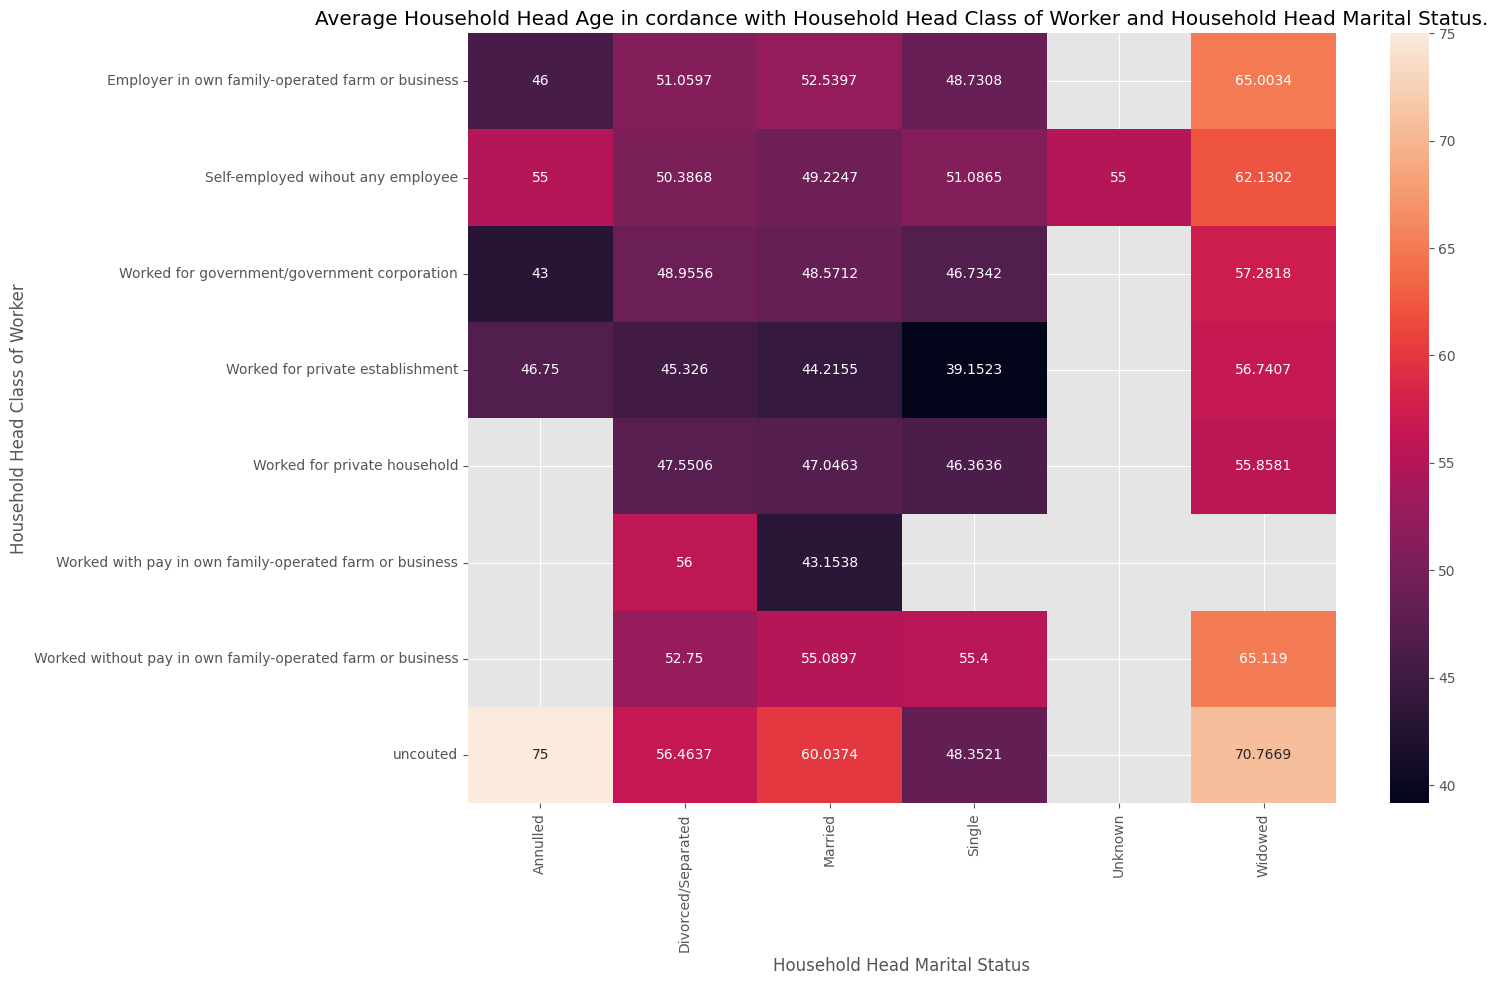

In [37]:
sns.heatmap(group_two, annot=True, fmt='g')
plt.title("Average Household Head Age in cordance with Household Head Class of Worker and Household Head Marital Status.")
plt.gcf().set_size_inches(14,10)
plt.show()

<p><span style='color: red;'>Question:</span> How does the average age of household heads vary across marital statuses and employment types?</p>

<p><span style='color: green;'>INSIGHT 17:</span> Household heads classified as self-employed without any employee tend to be older on average (around 50-62 years) across most marital statuses compared to those working for private establishments or government, who generally have lower average ages (mostly in the 40s). This suggests self-employment without employees may attract or be sustained by older individuals, possibly due to experience or the nature of their work.</p>

<p><span style='color: green;'>INSIGHT 18:</span> Household heads who are widowed consistently show the highest average ages across nearly all classes of workers (mostly above 55 years, with some categories like "worked without pay in own family-operated business" reaching above 65). This aligns with the typical demographic trend that widowhood increases with age, reflecting life stage differences in the dataset.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [38]:
group_three = df.groupby(['Household Head Job or Business Indicator', 'Household Head Sex', 'Main Source of Income'])['Total Household Income'].mean().unstack()
# group_three

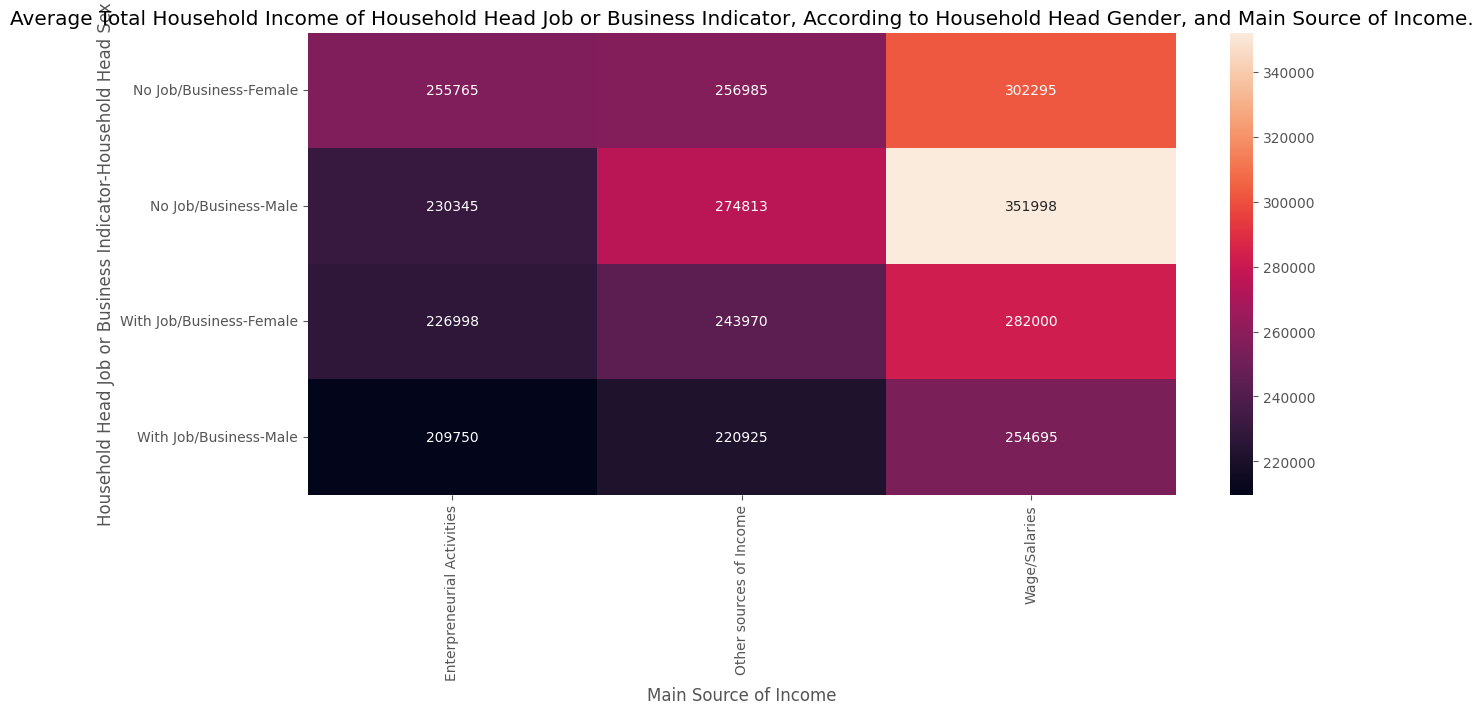

In [39]:
sns.heatmap(group_three, annot=True, fmt='g')
plt.title("Average Total Household Income of Household Head Job or Business Indicator, According to Household Head Gender, and Main Source of Income.")
plt.gcf().set_size_inches(14,6)
plt.show()

<p><span style='color: red;'>Question:</span> How does the household head’s job status, sex, and main source of income relate to the average total household income?</p>

<p><span style='color: green;'>INSIGHT 19:</span> Households with heads who have no job or business tend to have higher average total incomes across all main income sources compared to those with a job or business. This is especially notable for males receiving wages/salaries, with an average income of about 351,998, which is substantially higher than males with jobs/business (about 254,695). This might reflect households where the head is retired or supported by other household members or investments rather than active employment.</p>

<p><span style='color: green;'>INSIGHT 20:</span> For both males and females, the wage/salaries source of income generally correlates with the highest average household income compared to entrepreneurial activities or other sources, regardless of job/business status. This suggests wage employment offers more stable or higher income on average compared to entrepreneurship or other sources in this dataset.</p>

<hr style='border-bottom: .5px solid grey; opacity: .5'>

In [44]:
# group_x = df.groupby(['Household Head Job or Business Indicator', 'Main Source of Income'])['Total Household Income'].mean().unstack()
# group_x